# Day Trading By Chart Reading: Is it bullsh*t?

![image](https://www.newtraderu.com/wp-content/uploads/2019/01/Chart-Patterns.jpg)

A random walk is a mathematical concept used to describe a path that consists of a succession of random steps. In finance, the random walk hypothesis is a theory that stock market prices evolve according to a random walk and thus cannot be predicted. It suggests that the future path of the price of a stock is no more predictable than the path of a series of coin flips.

The random walk can be mathematically illustrated using the concept of a stochastic process. For stock returns, this is often modeled with a geometric Brownian motion, which is a continuous-time stochastic process. The formula for a geometric Brownian motion can be expressed in differential form as follows:

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

Where:
- $S_t$ is the stock price at time $t$.
- $dS_t$ is the change in stock price over an infinitesimally small time interval $dt$.
- $\mu$ is the drift coefficient (representing the expected return).
- $\sigma$ is the volatility of the stock (standard deviation of returns).
- $dW_t$ is a Wiener process or Brownian motion, representing the random component of stock price movements. Wiener process is $W(t) - W(0) \sim \mathcal{N}(0, t-s)$ where $0 < s < t$.

This formula essentially states that the change in the stock price over a small interval of time can be broken down into two components:
1. A deterministic component ($\mu S_t dt$), which is proportional to the stock price and the length of the time interval.
2. A stochastic or random component ($\sigma S_t dW_t$), which is also proportional to the stock price but involves a random term from the Wiener process.

In a discrete-time setting, the random walk for stock prices or returns can also be modeled more simply, where the price at time $t+1$ is the price at time $t$ plus a random step. This can be represented as:

$$S_{t+1} = S_t + \epsilon_t$$

Where $\epsilon_t$ is a random variable, often assumed to be normally distributed with mean 0 and some variance. This model represents the idea that future stock prices are random and unpredictable, based on past prices.

## Connect to HuggingFace

In [1]:
%%capture
! pip install git+https://github.com/huggingface/huggingface_hub.git@main
! sudo apt -qq install git-lfs
! git config --global credential.helper store

## Make sure you're logged in to Hugging Face CLI

In [2]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## Download and Import Packages

In [3]:
pip install yfinance mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.3 MB/s eta 0:00:00


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Explanation of `download_stock_data` Function

The `download_stock_data` function is designed to download stock market data for a specific ticker symbol.


### Function Definition
- `def download_stock_data(ticker):`
  - This defines a function named `download_stock_data`.
  - It takes a parameter `ticker`, which should be a string representing a stock ticker symbol.


### Downloading Stock Data
- `stock_data = yf.download(ticker, period="max")`
  - Uses the `yf.download` method from the `yfinance` library to download stock data.
  - `ticker` is the stock ticker symbol.
  - `period="max"` indicates fetching the maximum available historical data for the ticker.



### Return the Data
- `return stock_data`
  - The function returns the downloaded data as a pandas DataFrame.
  - The DataFrame typically contains columns like 'Open', 'High', 'Low', 'Close', and 'Volume'.


In [5]:
def download_stock_data(ticker):
    # Download stock data
    stock_data = yf.download(ticker, period="max")
    return stock_data

In [6]:
download_stock_data("AAPL")

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087116,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
...,...,...,...,...,...,...
2024-02-12,188.419998,188.669998,186.789993,187.149994,187.149994,41781900
2024-02-13,185.770004,186.210007,183.509995,185.039993,185.039993,56529500
2024-02-14,185.320007,185.529999,182.440002,184.149994,184.149994,54630500


## Explanation of `process_data` Function

The `process_data` function is designed for processing stock market data to create visual representations and calculate subsequent returns.

### Function Definition
- `def process_data(stock_data):`
  - This function processes historical stock market data.


### Initializing Lists
- `X = []`, `Y = []`
  - Initializes two lists for storing chart images (`X`) and next-day returns (`Y`).


### Looping Through Data
- `for i in range(0, len(stock_data), 20):`
  - Iterates over the stock data in 20-day chunks.



### Selecting 20-Day Data Chunk
- `data_chunk = stock_data.iloc[i:i+20]`
  - Selects a 20-day segment of the stock data.
- `if len(data_chunk) < 20 or i+20 >= len(stock_data): break`
  - Terminates the loop if the data chunk is less than 20 days or the end of the data is reached.



### Creating and Saving OHLC Chart
- Uses `mplfinance` to plot an OHLC chart and saves it to a `BytesIO` buffer.



### Image Processing
- Converts the saved plot to a black and white image, resizes it to 64x64 pixels, and appends it to `X`.



### Calculating Next Day Return
- Calculates the return for the day following each 20-day chunk and appends it to `Y`.



### Closing Plot
- `plt.close()`
  - Closes the matplotlib


In [7]:
import mplfinance as mpf
import pickle

### Credit: Professor Xiu

Professor Dacheng Xiu, based at the University of Chicago's Booth School of Business, excels in econometrics and statistics. 📊 His work enhances statistical methods for financial data, focusing on risk management, econometric derivatives modeling, and machine learning for big data in asset pricing. 📈 Xiu's influential research is published in top journals and has earned him numerous awards, including recognition from the Society for Financial Econometrics and Poets & Quants' Best 40-under-40. 🏅 With a PhD from Princeton, he's a leading mind in applying complex mathematics to economic challenges. 🎓🔍

- Credit to [Professor Xiu](https://dachxiu.chicagobooth.edu/)

![image](https://www.chicagobooth.edu/-/media/enterprise/chicagoboothlogo.png)

In [8]:
from tqdm import tqdm

In [88]:
def process_data(ticker, stock_data, start=5, no_of_future_days=20, w=256, h=256, stock_type="candle"):
    X = []
    Y = []
    # for i in range(0, len(stock_data)-start-1, start):
    for i in tqdm(range(0, len(stock_data)-start-1, 5)):
        # Select start-day data chunk
        data_chunk = stock_data.iloc[i:i+start]
        if len(data_chunk) < start or i+start >= len(stock_data):
            break

        # Create a BytesIO object to save plot
        buf = BytesIO()

        # Plot OHLC chart
        mpf.plot(data_chunk, type=stock_type, style='charles', savefig=dict(fname=buf, format='png', dpi=300, pad_inches=0), axisoff=True)

        # Sets the current file position to the beginning of the BytesIO object
        buf.seek(0)

        # Convert image to black and white and resize
        image = Image.open(buf)
        # image_bw = image.convert('L')
        image_bw_resized = image.resize((w, h))


        # Calculate next day return
        if i + start + no_of_future_days < len(stock_data):
            next_day_return = (stock_data.iloc[i + start + no_of_future_days]['Close'] - data_chunk.iloc[-1]['Close']) / data_chunk.iloc[-1]['Close']

            # Append label to Y
            Y.append(next_day_return)

            # Append image data to X
            X.append(np.array(image_bw_resized)[:, :, 0:3])

        plt.close()

        # Save (in case it crashes)
        if i % start == 0:
            dta = np.array(X), np.array(Y)
            with open(f'{ticker}_all_history_{w}_{h}_{stock_type}_window_{start}.pkl', 'wb') as handle:
                pickle.dump(dta, handle, protocol=pickle.HIGHEST_PROTOCOL)

    return np.array(X), np.array(Y)

In [89]:
w=h=299

In [169]:
def get_stock_data_and_returns(ticker, W=w, H=h, window_length=20):
    stock_data = download_stock_data(ticker)
    X, Y = process_data(ticker, stock_data, start=window_length, no_of_future_days=10, w=W, h=H)
    return X, Y

In [170]:
import tensorflow as tf

In [171]:
tf.test.gpu_device_name(), len(tf.test.gpu_device_name()), len(tf.test.gpu_device_name()) > 2

('/device:GPU:0', 13, True)

## Execution: Get Data

### Collect Data (from `yfinance`)

In [172]:
%%time

if len(tf.test.gpu_device_name()) > 2:
    with tf.device('/device:GPU:0'):
        X, Y = get_stock_data_and_returns("AAPL")
else:
    X, Y = get_stock_data_and_returns("AAPL")

[*********************100%%**********************]  1 of 1 completed
100%|██████████| 2173/2173 [24:41<00:00,  1.47it/s]


CPU times: user 20min 26s, sys: 10min 22s, total: 30min 49s
Wall time: 24min 43s


In [173]:
print(X.shape)
print(Y.shape)

(2172, 299, 299, 3)
(2172,)


In [178]:
np.array(((X/255)-1)*(-1)).max(), np.array(((X/255)-1)*(-1)).min()

(1.0, -0.0)

In [179]:
X_reversed = ((X/255)-1)*(-1)

In [180]:
X_reversed.min(), X_reversed.max()

(-0.0, 1.0)

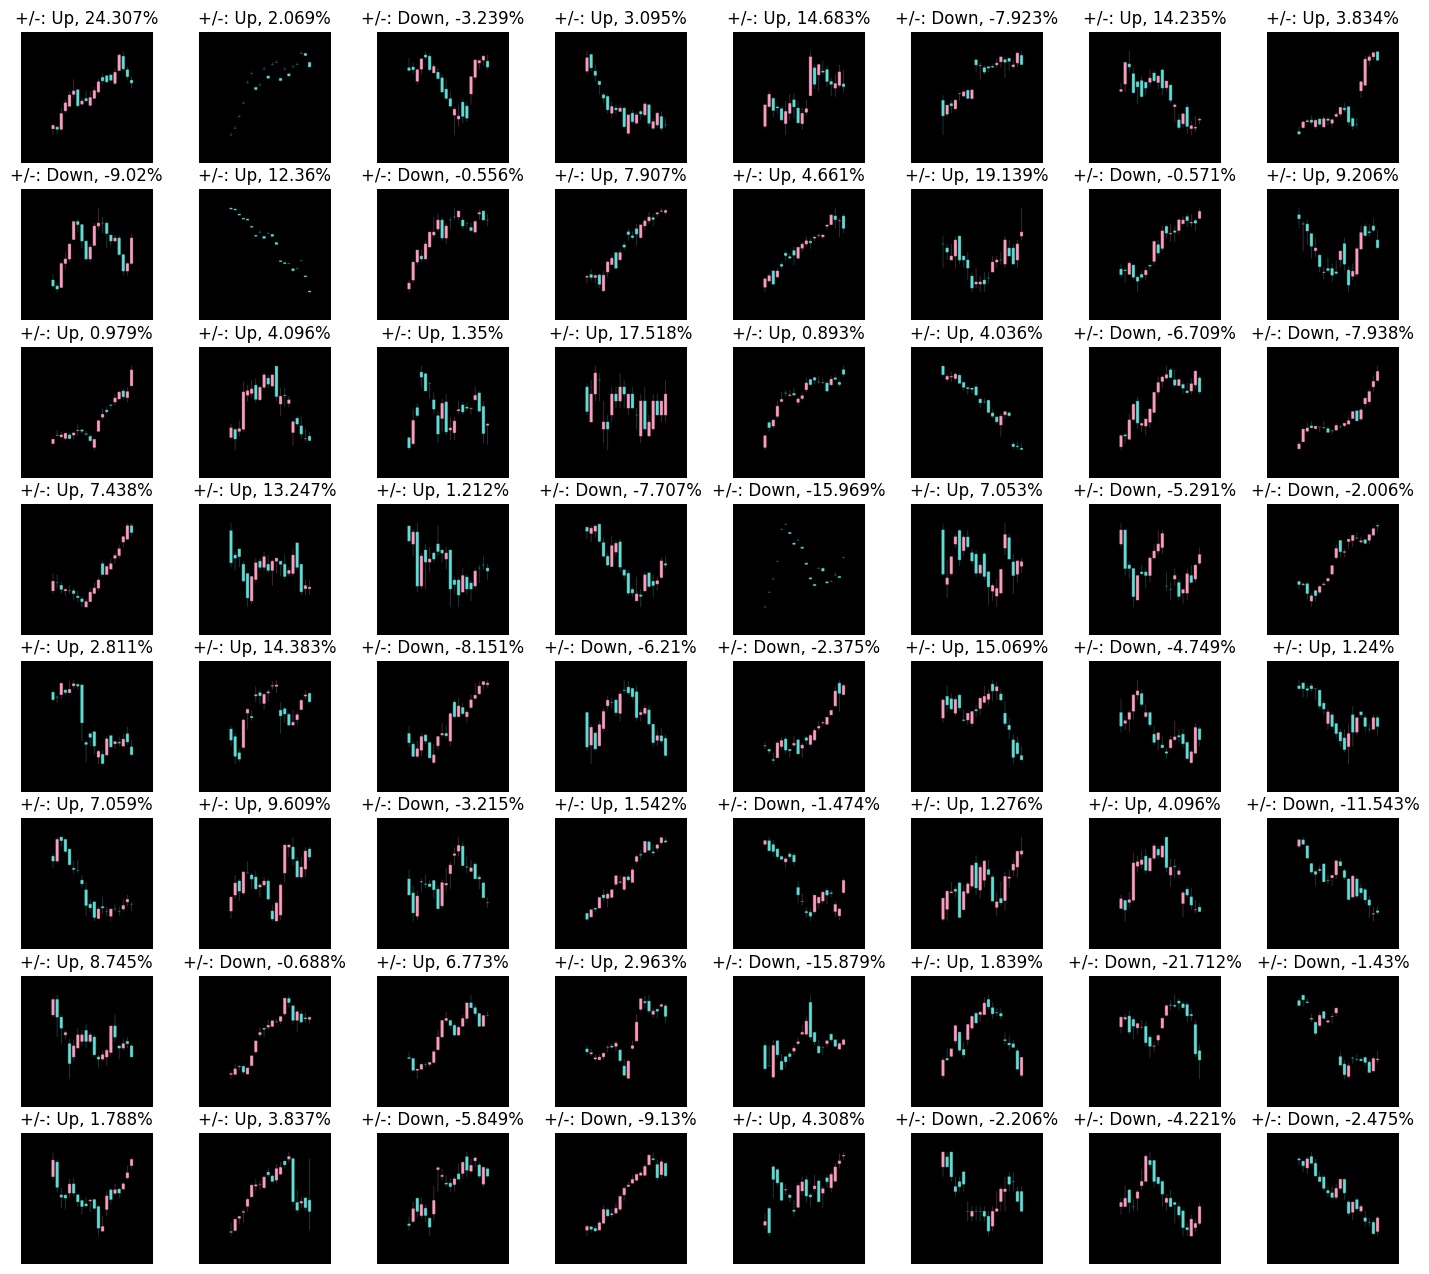

In [182]:
plt.figure(figsize=(18, 16))
s = 8
for i in range(s**2):
    idx = np.random.randint(0, len(X_reversed))
    plt.subplot(s, s, i+1)
    plt.imshow(X_reversed[idx], cmap='binary')
    sign = ["Down", "Up"][(round(Y[idx], 2) > 0).astype(int)]
    plt.title(f"+/-: {sign}, {np.around(Y[idx]*100, 3)}%")
    plt.axis('off')
plt.show()

In [110]:
import tensorflow as tf

In [183]:
X = X_reversed.reshape((-1, w, h, 3))
Y_binary = tf.keras.utils.to_categorical((Y > 0).astype(int))
X.shape, Y_binary.shape

((2172, 299, 299, 3), (2172, 2))

In [184]:
X.min(), X.max()

(-0.0, 1.0)

## VGG16

![image](https://datagen.tech/wp-content/uploads/2022/11/image2-1.png)

In [ ]:
from tensorflow.keras import layers, models

def build_vgg16_model(input_shape=(224, 224, 3), num_classes=1000):
    model = models.Sequential()

    # Block 1: 2x Convolutional Layers + Max Pooling
    model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 2: 2x Convolutional Layers + Max Pooling
    model.add(layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 3: 3x Convolutional Layers + Max Pooling
    model.add(layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 4: 3x Convolutional Layers + Max Pooling
    model.add(layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 5: 3x Convolutional Layers + Max Pooling
    model.add(layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [ ]:
# Build the VGG16 model
vgg16_model = build_vgg16_model(input_shape=(w, h, 3), num_classes=2)

In [ ]:
vgg16_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
with tf.device('/device:GPU:0'):
    history = vgg16_model.fit(
        X,
        Y_binary,
        batch_size=64,
        validation_split=0.1,
        epochs=3
    )

Epoch 1/10
8/8 [==============================] - 137s 9s/step - loss: 1362.3976 - accuracy: 0.5399 - val_loss: 0.7123 - val_accuracy: 0.4545
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 1.0942 - accuracy: 0.4928 - val_loss: 0.8762 - val_accuracy: 0.4545
Epoch 3/10
8/8 [==============================] - 12s 2s/step - loss: 0.7863 - accuracy: 0.5235 - val_loss: 0.6950 - val_accuracy: 0.4545
Epoch 4/10
8/8 [==============================] - 12s 2s/step - loss: 0.7180 - accuracy: 0.5031 - val_loss: 0.7129 - val_accuracy: 0.4545
Epoch 5/10
8/8 [==============================] - 12s 2s/step - loss: 0.7036 - accuracy: 0.4847 - val_loss: 0.6891 - val_accuracy: 0.5455
Epoch 6/10
8/8 [==============================] - 12s 2s/step - loss: 0.6982 - accuracy: 0.4888 - val_loss: 0.7584 - val_accuracy: 0.4545
Epoch 7/10
8/8 [==============================] - 12s 2s/step - loss: 0.7090 - accuracy: 0.5010 - val_loss: 0.7091 - val_accuracy: 0.4545
Epoch 8/10
8/8 [==============

In [ ]:
Yhat = vgg16_model.predict(X)

17/17 [==============================] - 14s 229ms/step


In [ ]:
(np.argmax(Yhat, axis=1) == (Y > 0).astype(int)).astype(int).mean()

0.5091911764705882

In [ ]:
X.shape, Y_binary.shape

((544, 299, 299, 3), (544, 2))

## VIT

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
try:
    import tensorflow_addons as tfa
except:
    !pip install tensorflow-addons
    import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [185]:
print(X.shape)
print(Y.shape)

(2172, 299, 299, 3)
(2172,)


In [186]:
X.min(), X.max()

(-0.0, 1.0)

In [188]:
Y_discretized = (Y > 0).astype(int)
np.unique(Y_discretized), Y_discretized.mean()

(array([0, 1]), 0.5547882136279927)

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_discretized, test_size=0.1, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1954, 299, 299, 3), (1954,), (218, 299, 299, 3), (218,))

In [191]:
num_classes = 2
input_shape = (w, h, 3)

### Define `vit` Parameters

In [167]:
learning_rate = 0.0001
weight_decay = 0.001
batch_size = 256
num_epochs = 500
image_size = 36  # We'll resize input images to this size || We can tune it later.
patch_size = 6  # Size of the patches to be extract from the input images || We can tune it later.
num_patches = (image_size // patch_size) ** 2
projection_dim = 32
num_heads = 8
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 20
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

## Define `data_augmentation`

In [30]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

## Define `mlp`

In [31]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

## Define `Patches`

In [32]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [155]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the Patches class here...

# Assuming the following variables are defined correctly:
# image_size, patch_size = 299, 32

def plot_patches(patch_size, image_size):
    plt.figure(figsize=(4, 4))
    # Randomly choose an image index
    image_index = np.random.choice(x_train.shape[0])
    image = x_train[image_index]
    plt.imshow(image)
    # plt.imshow(image.astype("uint8"))
    plt.axis("off")
    # plt.show()

    resized_image = tf.image.resize(
        tf.convert_to_tensor([image]), size=(image_size, image_size)
    )
    patches_layer = Patches(patch_size)
    patches = patches_layer(resized_image)
    print(f"Image size: {image_size} X {image_size}")
    print(f"Patch size: {patch_size} X {patch_size}")
    print(f"Patches per image: {patches.shape[1]}")
    print(f"Elements per patch: {patches.shape[-1]}")

    n = int(np.sqrt(patches.shape[1]))
    plt.figure(figsize=(n, n))
    for i in range(patches.shape[1]):
        patch = patches[0, i]
        ax = plt.subplot(n, n, i + 1)
        patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
        plt.imshow(patch_img.numpy())
        # plt.imshow(patch_img.numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

### Investigate `image_size` and `patch_size` (with plots)

Image size: 36 X 36
Patch size: 6 X 6
Patches per image: 36
Elements per patch: 108


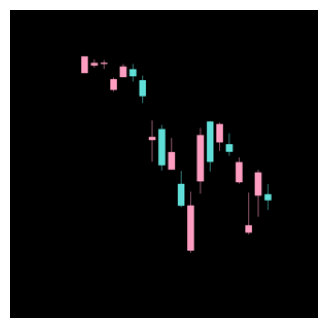

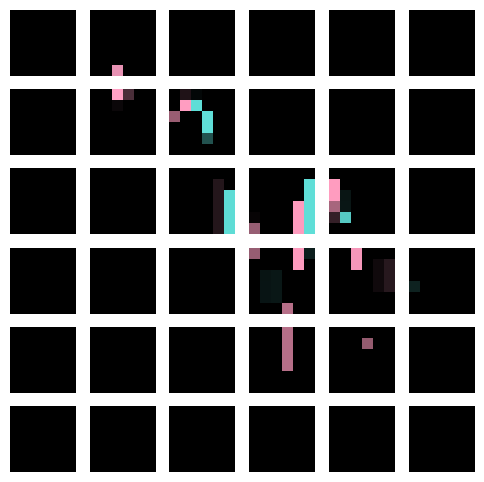

CPU times: user 1.09 s, sys: 333 ms, total: 1.42 s
Wall time: 1.03 s


In [157]:
%%time

image_size = 36  # We'll resize input images to this size || We can tune it later.
patch_size = 6   # Size of the patches to be extract from the input images || We can tune it later.
plot_patches(patch_size, image_size)

## Build `vit` Model: `create_vit_classifier`

In [36]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

### Build and Fit

In [192]:
%%time

if len(tf.test.gpu_device_name()) > 2:
    print("Using GPU")
    with tf.device('/device:GPU:0'):
        vit_classifier = create_vit_classifier()
        history = run_experiment(vit_classifier)
else:
    print("GPU not found, so use CPU.")
    vit_classifier = create_vit_classifier()
    history = run_experiment(vit_classifier)

Using GPU
Epoch 1/500
7/7 [==============================] - 30s 895ms/step - loss: 1.2546 - accuracy: 0.5222 - top-5-accuracy: 1.0000 - val_loss: 0.6938 - val_accuracy: 0.4796 - val_top-5-accuracy: 1.0000
Epoch 2/500
7/7 [==============================] - 1s 155ms/step - loss: 1.1040 - accuracy: 0.4989 - top-5-accuracy: 1.0000 - val_loss: 1.0437 - val_accuracy: 0.4796 - val_top-5-accuracy: 1.0000
Epoch 3/500
7/7 [==============================] - 1s 155ms/step - loss: 0.9633 - accuracy: 0.4972 - top-5-accuracy: 1.0000 - val_loss: 0.8019 - val_accuracy: 0.4796 - val_top-5-accuracy: 1.0000
Epoch 4/500
7/7 [==============================] - 1s 158ms/step - loss: 0.8856 - accuracy: 0.5119 - top-5-accuracy: 1.0000 - val_loss: 0.8446 - val_accuracy: 0.4796 - val_top-5-accuracy: 1.0000
Epoch 5/500
7/7 [==============================] - 1s 158ms/step - loss: 0.8403 - accuracy: 0.5051 - top-5-accuracy: 1.0000 - val_loss: 0.7959 - val_accuracy: 0.4796 - val_top-5-accuracy: 1.0000
Epoch 6/500
7/

In [144]:
vit_classifier.evaluate(x_test, y_test)

7/7 [==============================] - 0s 23ms/step - loss: 0.6946 - accuracy: 0.5346 - top-5-accuracy: 1.0000


[0.6946068406105042, 0.5345622301101685, 1.0]

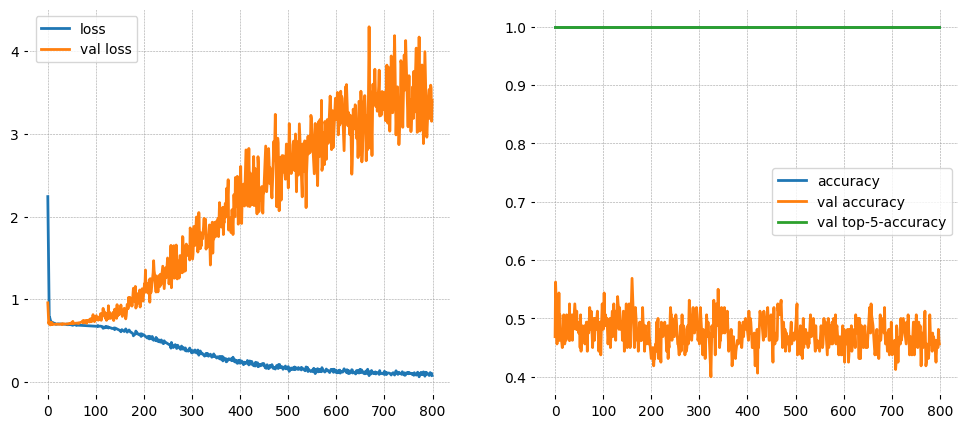

In [145]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val loss'])
plt.subplot(1, 2, 2)
plt.plot(history.history['top-5-accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_top-5-accuracy'])
plt.legend(['accuracy', 'val accuracy', 'val top-5-accuracy'])
plt.show()

In [121]:
vit_classifier.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 36, 36, 3)            7         ['input_6[0][0]']             
 ial)                                                                                             
                                                                                                  
 patches_13 (Patches)        (None, None, 3072)           0         ['data_augmentation[5][0]']   
                                                                                                  
 patch_encoder_5 (PatchEnco  (None, 36, 32)               99488     ['patches_13[0][0]']    

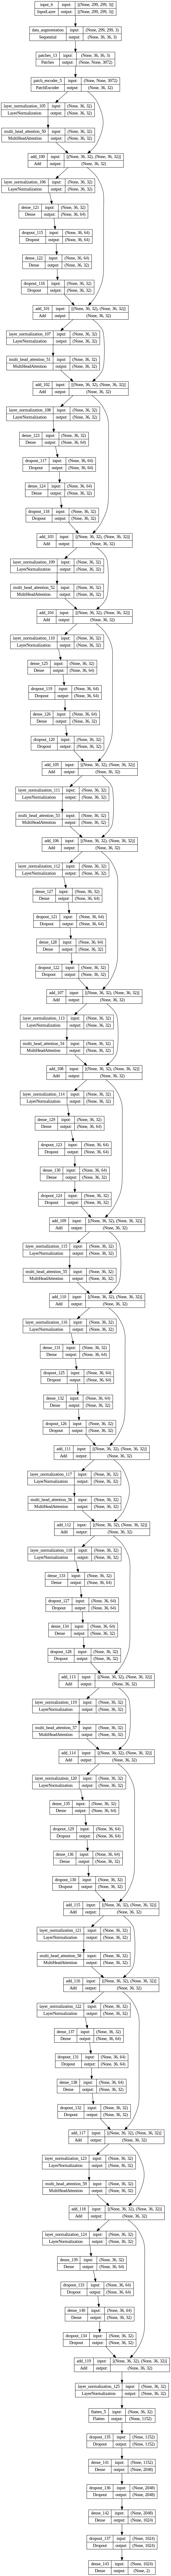

In [122]:
tf.keras.utils.plot_model(vit_classifier, show_shapes=True)

## Save to HuggingFace

In [41]:
from huggingface_hub import push_to_hub_keras

In [123]:
user_name = "eagle0504"
model_name = "keras-stock-chart-vit-v0"

In [124]:
%%time

push_to_hub_keras(vit_classifier, f'{model_name}')

fingerprint.pb:   0%|          | 0.00/55.0 [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/2.30M [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/234k [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

variables.data-00000-of-00001:   0%|          | 0.00/19.2M [00:00<?, ?B/s]

KeyboardInterrupt: 

## Retrieve Model from HuggingFace

In [ ]:
from huggingface_hub import from_pretrained_keras

In [ ]:
print(f'{user_name}/{model_name}')

eagle0504/keras-stock-chart-vit-v0


In [ ]:
%%time

# Replace nateraw with your username that you logged in with!
some_brand_new_model = from_pretrained_keras(f'{user_name}/{model_name}')

In [ ]:
some_brand_new_model.summary()